In [174]:
df=pd.read_csv('titanic.csv')

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer


 


In [206]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [207]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [208]:
df.interpolate()

C:\Users\aa\AppData\Local\Temp\ipykernel_11208\4002874584.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.5,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [209]:
df1=df.copy()

In [210]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [211]:
df_train=df1[:800]
df_test=df1[800:]

In [212]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [213]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
800,801,0,2,"Ponesell, Mr. Martin",male,34.00,0,0,250647,13.0000,NaN,S
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.00,1,1,C.A. 31921,26.2500,NaN,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.00,0,0,347089,6.9750,NaN,S


In [214]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  800 non-null    int64  
 1   Survived     800 non-null    int64  
 2   Pclass       800 non-null    int64  
 3   Name         800 non-null    object 
 4   Sex          800 non-null    object 
 5   Age          637 non-null    float64
 6   SibSp        800 non-null    int64  
 7   Parch        800 non-null    int64  
 8   Ticket       800 non-null    object 
 9   Fare         800 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     799 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 75.1+ KB


In [215]:
df_train["Sex"].value_counts()

Sex
male      517
female    283
Name: count, dtype: int64

In [216]:
df_train["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
C22 C26        3
D              3
E101           3
              ..
E36            1
C106           1
A19            1
D7             1
D17            1
Name: count, Length: 136, dtype: int64

In [217]:
# Drop specified columns
columns_to_drop = ['Name','Cabin','Embarked', 'Ticket']

df_train = df_train.drop(columns_to_drop, axis=1)
df_test = df_test.drop(columns_to_drop, axis=1)


In [218]:
print("Columns in df_train:", df_train.columns)
print("Columns in df_test:", df_test.columns)

Columns in df_train: Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')
Columns in df_test: Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')


In [219]:
df_test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
800,801,0,2,male,34.00,0,0,13.0000
801,802,1,2,female,31.00,1,1,26.2500
802,803,1,1,male,11.00,1,2,120.0000
803,804,1,3,male,0.42,0,1,8.5167
804,805,1,3,male,27.00,0,0,6.9750
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.00,0,0,13.0000
887,888,1,1,female,19.00,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.00,0,0,30.0000


In [220]:
df_train = df_train.dropna()

In [221]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
795,796,0,2,male,39.0,0,0,13.0000
796,797,1,1,female,49.0,0,0,25.9292
797,798,1,3,female,31.0,0,0,8.6833
798,799,0,3,male,30.0,0,0,7.2292


In [222]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637 entries, 0 to 799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  637 non-null    int64  
 1   Survived     637 non-null    int64  
 2   Pclass       637 non-null    int64  
 3   Sex          637 non-null    object 
 4   Age          637 non-null    float64
 5   SibSp        637 non-null    int64  
 6   Parch        637 non-null    int64  
 7   Fare         637 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 44.8+ KB


In [223]:
df_test=df_test.dropna()

In [224]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 800 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  77 non-null     int64  
 1   Survived     77 non-null     int64  
 2   Pclass       77 non-null     int64  
 3   Sex          77 non-null     object 
 4   Age          77 non-null     float64
 5   SibSp        77 non-null     int64  
 6   Parch        77 non-null     int64  
 7   Fare         77 non-null     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 5.4+ KB


In [225]:
obj_columns = df_train.select_dtypes(include = "object").columns

In [226]:
obj_columns

Index(['Sex'], dtype='object')

In [232]:
le_list = []
for i in obj_columns[1:]:
    le = LabelEncoder()
    print(i)
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.transform(df_test[i])
    le_list.append(le)
    
ohe_label = LabelEncoder()
df_train['Transported'] = ohe_label.fit_transform(df_train['Transported'])

KeyError: 'Transported'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


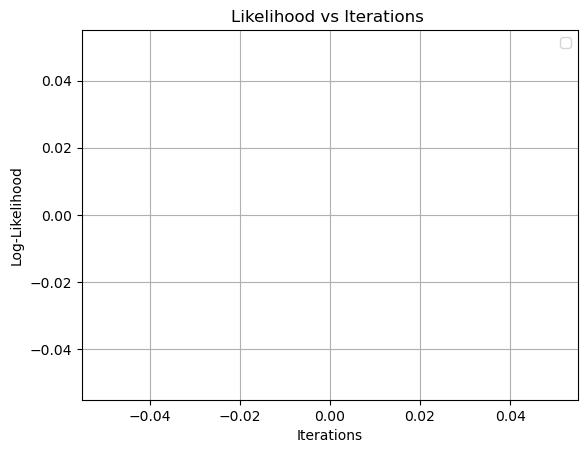

In [233]:
plt.figure()
plt.title("Likelihood vs Iterations ")
plt.xlabel("Iterations")
plt.ylabel("Log-Likelihood")
plt.plot(range(len(log_likelihood)), log_likelihood, color="r")
plt.legend()
plt.grid()
plt.show()

In [234]:
log_likelihood = []
class LogisticRegression():
    
    def __init__(self, data , labels , lr, max_iteration, stop_dif):
        self.lr = lr
        self.max_iteration = max_iteration
        self.stop_dif = stop_dif
        print(data.shape)
        print(labels.shape)
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def prediction(self, X,w):
        '''
        This function calculates the results of the sigmoid function which will later be used for predictions.
        '''
        return self.sigmoid((np.dot(X, w)))
    def log_like(self, data, labels, w, z, prob):
        '''
        This function calculates the log likelihood in each iteration. The higher the value of the log-likelihood, the better a model fits a dataset. 
        '''
        ll = np.sum(labels*np.log(prob)+(1-labels)*np.log(1-prob))
        #print(ll)
        log_likelihood.append(ll)
    def predict(self, X, w):
        '''
        This function predicts the labels.
        '''
        pred_labels = np.zeros((X.shape[0]))
        preds = self.prediction(X,w) >= 0.5
        for i in range(0, len(preds)):
            if preds[i] == True:
                pred_labels[i] = 1
            else:
                pred_labels[i]= 0
        return pred_labels
    def accuracy(self,X, y_labels, w):
        '''
        This function returns the accuracy.
        '''
        return (self.predict(X, w)==y_labels).mean()
    
    def log_reg(self, data, labels):
        '''
        This function updates the weights associated with features in each iteration.
        '''
        # initialize the weights with zeros
        w = np.zeros(data.shape[1])
        w_zero = w
        #Weight updation in each iteration
        for step in range(self.max_iteration):
            lambda1 = 0.001
            z= np.dot(data, w)
            prob = self.prediction(data, w)
            gradient = np.dot(data.T, (labels - (np.exp(z)/(1+np.exp(z)))))
            w = w - self.lr*lambda1*w + (self.lr/labels.size)*gradient
            self.log_like(data, labels, w, z, prob)
            if step > 300:
                if (-log_likelihood[step-1]+log_likelihood[step]) <self.stop_dif:
                    break
        return w

In [235]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [236]:
X_train = df_train.drop(['Transported'], axis = 1)
X_train = X_train.to_numpy(dtype = 'float32')
Y_train = df_train['Transported'].to_numpy(dtype = 'int')

X_train = X_train - np.mean(X_train, axis=0)
X_train =  X_train / np.std(X_train, axis=0)
model = LogisticRegression(X_train, Y_train , 0.1, 1000, 0.001)
fit = model.log_reg(X_train, Y_train)
pred_train = model.predict(X_train, fit)

#
accuracy_train_x = (pred_train == Y_train).mean()
predicted_labels_test = model.predict(df_test.to_numpy(dtype = 'float32'), fit)

KeyError: "['Transported'] not found in axis"